## Seattle Bicycle Analysis

This data set is obtained from [https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k] The Fremont Bridge Bicycle Counter records the number of bikes that cross the bridge using the pedestrian/bicycle pathways. Inductive loops on the east and west pathways count the passing of bicycles regardless of travel direction.

In [1]:
import pandas as pd


In [2]:
data=pd.read_csv('data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv',delimiter=';',index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52536 entries, 2012-10-03 00:00:00 to 2018-09-30 23:00:00
Data columns (total 2 columns):
Fremont Bridge East Sidewalk    52527 non-null float64
Fremont Bridge West Sidewalk    52527 non-null float64
dtypes: float64(2)
memory usage: 1.2 MB


In [4]:
data.columns=['East','West']
data['total']=data.eval('East+West')

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0,0.5,'monthly bicycle count')

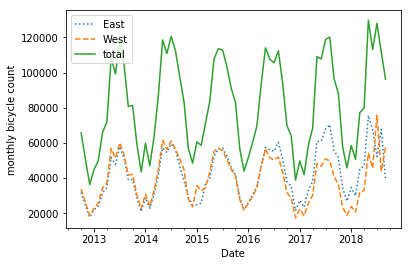

In [6]:
monthly=data.resample('M').sum()
monthly.plot(style=[':','--','-'])
plt.ylabel('monthly bicycle count')

We can see that the seaonable trend with the bicycle counts. In the summer there are more bicycles than in winter.


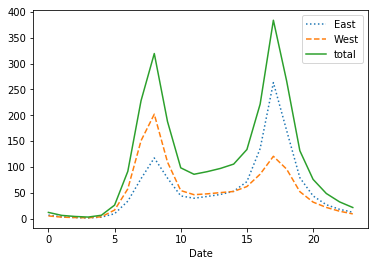

In [7]:
by_hour=data.groupby(data.index.hour).mean()
by_hour.plot(style=[':','--','-'])

The hourly traffics peaks at 8am in the morning and around 5pm in the afternoon. This is expected as this is the rush hours for work. 

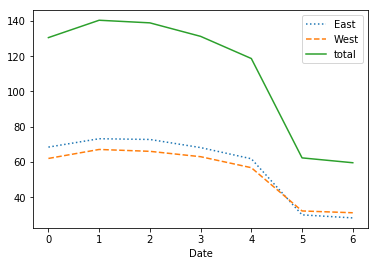

In [8]:
by_weekday=data.groupby(data.index.dayofweek).mean()
by_weekday.plot(style=[':','--','-'])

It shows in this graph that there are less people riding bicycles on weekends.

### Predicting Bicycle Traffic

Join the weather information and try to predict the bicycle traffic through weather data.

In [9]:
weather=pd.read_csv('data/BicycleWeather.csv',delimiter=',',index_col='DATE',parse_dates=True)
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [10]:
daily=data.resample('D').sum()

In the previous analysis, the traffic pattern varies from weekday to weekends. We add this as a feature.
Also holidays we might expect counts of bikes are different. 

In [11]:
days=['Mon','Tus','Wed','Thur','Fri','Sat','Sun']

for i in range(7):
    daily[days[i]]=(daily.index.dayofweek==i).astype(float)


In [12]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal=USFederalHolidayCalendar()
holidays=cal.holidays('2012','2018')
type(holidays)

pandas.core.indexes.datetimes.DatetimeIndex

In [13]:
holiday_pd=pd.Series(1,index=holidays,name='holiday')
daily=daily.join(holiday_pd)
daily['holiday'].fillna(0,inplace=True)
daily.head()

,East,West,total,Mon,Tus,Wed,Thur,Fri,Sat,Sun,holiday
Date,,,,,,,,,,,
2012-10-03,1761.0,1760.0,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,1767.0,1708.0,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,1590.0,1558.0,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,926.0,1080.0,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,951.0,1191.0,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
daily=daily.drop(['East','West'],axis=1)

In [15]:
# add temp information

# temperature are in 1/10C, convert to C

weather['TMIN']/=10
weather['TMAX']/=10
weather['Temp (C)']= 0.5* (weather['TMIN']+weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP']/=254
weather['dry day']=(weather['PRCP']==0).astype(int)

daily=daily.join(weather[['PRCP','Temp (C)','dry day']])
daily.dropna(axis=0,how='any',inplace=True)
daily.head()

,total,Mon,Tus,Wed,Thur,Fri,Sat,Sun,holiday,PRCP,Temp (C),dry day
Date,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.35,1.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.60,1.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.30,1.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.85,1.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.85,1.0


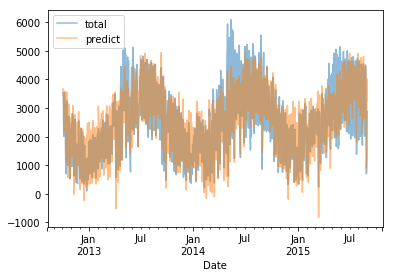

In [16]:
X=daily.drop('total',axis=1)
y=daily['total']

from sklearn.linear_model import LinearRegression

model=LinearRegression(fit_intercept=False)
model.fit(X,y)
daily['predict']=model.predict(X)

daily[['total','predict']].plot(alpha=0.5)


In [18]:
params=pd.Series(model.coef_,index=X.columns)
params

Mon         1509.727193
Tus         1621.593514
Wed         1611.790161
Thur        1500.753247
Fri         1195.348799
Sat          -91.025495
Sun         -121.644954
holiday    -1261.444520
PRCP        -728.286037
Temp (C)     108.278152
dry day      613.411551
dtype: float64

In [26]:
# how do we measure the uncertainty in the coeffients
# using bootstrap.

import numpy as np
from sklearn.utils import resample

np.random.seed(1)
err=np.std([model.fit(*resample(X,y)).coef_ for i in range(1000)],axis=0)

print(pd.DataFrame({'effect': params.round(0),
                   'error': err.round(0)}))

          effect  error
Mon       1510.0   58.0
Tus       1622.0   57.0
Wed       1612.0   58.0
Thur      1501.0   55.0
Fri       1195.0   56.0
Sat        -91.0   50.0
Sun       -122.0   48.0
holiday  -1261.0  162.0
PRCP      -728.0   75.0
Temp (C)   108.0    3.0
dry day    613.0   37.0


In [34]:
X = np.array([[1., 0.], [2., 1.], [0., 0.]])
y = np.array([[0], [1], [2]])
print(X)
print(y)

[[1. 0.]
 [2. 1.]
 [0. 0.]]
[[0]
 [1]
 [2]]


In [35]:
print(resample(X,y))

[array([[2., 1.],
       [2., 1.],
       [2., 1.]]), array([[1],
       [1],
       [1]])]


In [29]:
*resample(X,y)

SyntaxError: can't use starred expression here (<ipython-input-29-f2ef1ddf2d47>, line 1)